In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '7'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [ ]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [ ]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [ ]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [ ]:
def build_1d_cnn_only_conv_conv_5_DO(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=8, strides=1, padding='valid', input_shape=input_shape)) 
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=8*(2**(i+1)), strides=1, padding='valid'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [ ]:
for i in range(1, 9):
    model = build_1d_cnn_only_conv_conv_5_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 15996, 8)          48        
_________________________________________________________________
activation (Activation)      (None, 15996, 8)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5332, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 42656)             0         
_________________________________________________________________
dropout (Dropout)            (None, 42656)             0         
_________________________________________________________________
dense (Dense)        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 15996, 8)          48        
_________________________________________________________________
activation_15 (Activation)   (None, 15996, 8)          0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 5332, 8)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 5328, 16)          656       
_________________________________________________________________
activation_16 (Activation)   (None, 5328, 16)          0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 1776, 16)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1772, 32)          2592      
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.5447 - acc: 0.1967
Epoch 00001: val_loss improved from inf to 2.40603, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_1_conv_checkpoint/001-2.4060.hdf5
36805/36805 [==============================] - 8s 226us/sample - loss: 2.5442 - acc: 0.1970 - val_loss: 2.4060 - val_acc: 0.2835
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.2986 - acc: 0.3091
Epoch 00002: val_loss improved from 2.40603 to 2.26586, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_1_conv_checkpoint/002-2.2659.hdf5
36805/36805 [==============================] - 7s 178us/sample - loss: 2.2987 - acc: 0.3092 - val_loss: 2.2659 - val_acc: 0.3282
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1618 - acc: 0.3527
Epoch 00003: val_loss improved from 2.26586 to 2.20813, savin

Epoch 27/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.3600 - acc: 0.5865
Epoch 00027: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 176us/sample - loss: 1.3601 - acc: 0.5866 - val_loss: 2.2208 - val_acc: 0.3364
Epoch 28/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.3464 - acc: 0.5883
Epoch 00028: val_loss did not improve from 2.11714
36805/36805 [==============================] - 7s 179us/sample - loss: 1.3463 - acc: 0.5883 - val_loss: 2.2244 - val_acc: 0.3364
Epoch 29/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.3325 - acc: 0.5895
Epoch 00029: val_loss did not improve from 2.11714
36805/36805 [==============================] - 7s 178us/sample - loss: 1.3327 - acc: 0.5893 - val_loss: 2.2221 - val_acc: 0.3322
Epoch 30/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.3205 - acc: 0.5939
Epoch 00030: val_loss did not improve from 2.11714
36805/36805 [========

Epoch 57/500
36544/36805 [============================>.] - ETA: 0s - loss: 1.0602 - acc: 0.6703
Epoch 00057: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 169us/sample - loss: 1.0613 - acc: 0.6699 - val_loss: 2.3128 - val_acc: 0.3543
Epoch 58/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.0571 - acc: 0.6712
Epoch 00058: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 174us/sample - loss: 1.0575 - acc: 0.6710 - val_loss: 2.3194 - val_acc: 0.3508
Epoch 59/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.0416 - acc: 0.6750
Epoch 00059: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 172us/sample - loss: 1.0421 - acc: 0.6749 - val_loss: 2.3266 - val_acc: 0.3445
Epoch 60/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.0417 - acc: 0.6746
Epoch 00060: val_loss did not improve from 2.11714
36805/36805 [========

Epoch 87/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.9105 - acc: 0.7132
Epoch 00087: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 173us/sample - loss: 0.9102 - acc: 0.7134 - val_loss: 2.4264 - val_acc: 0.3611
Epoch 88/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.9123 - acc: 0.7126
Epoch 00088: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 172us/sample - loss: 0.9121 - acc: 0.7126 - val_loss: 2.4405 - val_acc: 0.3557
Epoch 89/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.9017 - acc: 0.7127
Epoch 00089: val_loss did not improve from 2.11714
36805/36805 [==============================] - 6s 173us/sample - loss: 0.9016 - acc: 0.7128 - val_loss: 2.4465 - val_acc: 0.3545
Epoch 90/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.9037 - acc: 0.7149
Epoch 00090: val_loss did not improve from 2.11714
36805/36805 [========

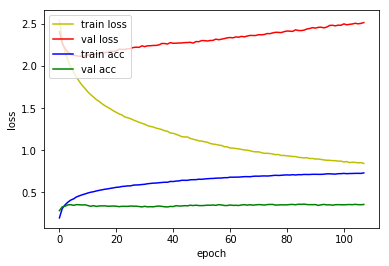

4815/4815 [==============================] - 1s 149us/sample - loss: 2.1209 - acc: 0.3283
Loss: 2.1209438459647902 Accuracy: 0.3283489

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.5330 - acc: 0.2090
Epoch 00001: val_loss improved from inf to 2.29690, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_2_conv_checkpoint/001-2.2969.hdf5
36805/36805 [==============================] - 9s 245us/sample - loss: 2.5322 - acc: 0.2095 - val_loss: 2.2969 - val_acc: 0.3119
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.1500 - acc: 0.3507
Epoch 00002: val_loss improved from 2.29690 to 2.06733, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_2_conv_checkpoint/002-2.0673.hdf5
36805/36805 [==============================] - 8s 218us/sample - loss: 2.1498 - acc: 0.3509 - val_loss: 2.0673 - val_acc: 0.4041
Epoch 3/500
36672/36805 [============================>.] - ETA: 0s - 

Epoch 24/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.1575 - acc: 0.6379
Epoch 00024: val_loss did not improve from 1.62491
36805/36805 [==============================] - 8s 216us/sample - loss: 1.1580 - acc: 0.6379 - val_loss: 1.6269 - val_acc: 0.4976
Epoch 25/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.1458 - acc: 0.6413
Epoch 00025: val_loss did not improve from 1.62491
36805/36805 [==============================] - 8s 221us/sample - loss: 1.1456 - acc: 0.6411 - val_loss: 1.6368 - val_acc: 0.4910
Epoch 26/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.1284 - acc: 0.6481
Epoch 00026: val_loss improved from 1.62491 to 1.61861, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_2_conv_checkpoint/026-1.6186.hdf5
36805/36805 [==============================] - 8s 218us/sample - loss: 1.1285 - acc: 0.6480 - val_loss: 1.6186 - val_acc: 0.5010
Epoch 27/500
36608/36805 [============================>.] - ETA: 0s - 

Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8586 - acc: 0.7249
Epoch 00053: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 219us/sample - loss: 0.8585 - acc: 0.7250 - val_loss: 1.6074 - val_acc: 0.5260
Epoch 54/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.8622 - acc: 0.7251
Epoch 00054: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 221us/sample - loss: 0.8629 - acc: 0.7251 - val_loss: 1.6173 - val_acc: 0.5278
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8510 - acc: 0.7256
Epoch 00055: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 214us/sample - loss: 0.8511 - acc: 0.7255 - val_loss: 1.6103 - val_acc: 0.5320
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8401 - acc: 0.7345
Epoch 00056: val_loss did not improve from 1.60045
36805/36805 [========

Epoch 83/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.7064 - acc: 0.7709
Epoch 00083: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 221us/sample - loss: 0.7063 - acc: 0.7709 - val_loss: 1.6412 - val_acc: 0.5458
Epoch 84/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6910 - acc: 0.7771
Epoch 00084: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 217us/sample - loss: 0.6916 - acc: 0.7767 - val_loss: 1.6383 - val_acc: 0.5444
Epoch 85/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.6906 - acc: 0.7755
Epoch 00085: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 218us/sample - loss: 0.6903 - acc: 0.7757 - val_loss: 1.6412 - val_acc: 0.5476
Epoch 86/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.6875 - acc: 0.7771
Epoch 00086: val_loss did not improve from 1.60045
36805/36805 [========

Epoch 113/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.5866 - acc: 0.8083
Epoch 00113: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 216us/sample - loss: 0.5866 - acc: 0.8084 - val_loss: 1.6500 - val_acc: 0.5614
Epoch 114/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.5816 - acc: 0.8100
Epoch 00114: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 215us/sample - loss: 0.5819 - acc: 0.8098 - val_loss: 1.6641 - val_acc: 0.5590
Epoch 115/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.5776 - acc: 0.8119
Epoch 00115: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 222us/sample - loss: 0.5774 - acc: 0.8121 - val_loss: 1.6702 - val_acc: 0.5567
Epoch 116/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.5788 - acc: 0.8102
Epoch 00116: val_loss did not improve from 1.60045
36805/36805 [====

Epoch 143/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4981 - acc: 0.8366
Epoch 00143: val_loss did not improve from 1.60045
36805/36805 [==============================] - 8s 218us/sample - loss: 0.4977 - acc: 0.8368 - val_loss: 1.6981 - val_acc: 0.5672

1D_CNN_only_conv_conv_5_DO_2_conv Model


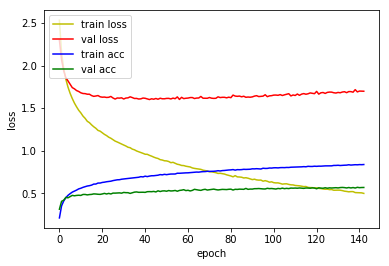

4815/4815 [==============================] - 1s 187us/sample - loss: 1.6641 - acc: 0.5016
Loss: 1.6641123400546556 Accuracy: 0.50155765

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36608/36805 [============================>.] - ETA: 0s - loss: 2.4590 - acc: 0.2213
Epoch 00001: val_loss improved from inf to 2.11647, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_3_conv_checkpoint/001-2.1165.hdf5
36805/36805 [==============================] - 10s 285us/sample - loss: 2.4575 - acc: 0.2220 - val_loss: 2.1165 - val_acc: 0.3776
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.9595 - acc: 0.3946
Epoch 00002: val_loss improved from 2.11647 to 1.81496, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_3_conv_checkpoint/002-1.8150.hdf5
36805/36805 [==============================] - 9s 243us/sample - loss: 1.9590 - acc: 0.3950 - val_loss: 1.8150 - val_acc: 0.4568
Epoch 3/500
36608/36805 [============================>.] - ETA: 0s 

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0018 - acc: 0.6938
Epoch 00024: val_loss improved from 1.24081 to 1.23514, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_3_conv_checkpoint/024-1.2351.hdf5
36805/36805 [==============================] - 9s 244us/sample - loss: 1.0019 - acc: 0.6938 - val_loss: 1.2351 - val_acc: 0.6203
Epoch 25/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.9899 - acc: 0.6990
Epoch 00025: val_loss did not improve from 1.23514
36805/36805 [==============================] - 9s 239us/sample - loss: 0.9897 - acc: 0.6991 - val_loss: 1.2427 - val_acc: 0.6189
Epoch 26/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.9649 - acc: 0.7053
Epoch 00026: val_loss improved from 1.23514 to 1.22588, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_3_conv_checkpoint/026-1.2259.hdf5
36805/36805 [==============================] - 9s 241us/sample - loss: 0.9652 - acc: 0.7053 - val_lo

36608/36805 [============================>.] - ETA: 0s - loss: 0.6700 - acc: 0.7919
Epoch 00049: val_loss did not improve from 1.15119
36805/36805 [==============================] - 9s 239us/sample - loss: 0.6700 - acc: 0.7920 - val_loss: 1.1623 - val_acc: 0.6553
Epoch 50/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6731 - acc: 0.7897
Epoch 00050: val_loss did not improve from 1.15119
36805/36805 [==============================] - 9s 243us/sample - loss: 0.6732 - acc: 0.7896 - val_loss: 1.1602 - val_acc: 0.6515
Epoch 51/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6530 - acc: 0.7967
Epoch 00051: val_loss did not improve from 1.15119
36805/36805 [==============================] - 9s 238us/sample - loss: 0.6531 - acc: 0.7966 - val_loss: 1.1520 - val_acc: 0.6562
Epoch 52/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6452 - acc: 0.7987
Epoch 00052: val_loss did not improve from 1.15119
36805/36805 [=====================

36672/36805 [============================>.] - ETA: 0s - loss: 0.4780 - acc: 0.8468
Epoch 00078: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 241us/sample - loss: 0.4782 - acc: 0.8467 - val_loss: 1.1603 - val_acc: 0.6748
Epoch 79/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4716 - acc: 0.8485
Epoch 00079: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 241us/sample - loss: 0.4715 - acc: 0.8486 - val_loss: 1.1825 - val_acc: 0.6697
Epoch 80/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4688 - acc: 0.8482
Epoch 00080: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 239us/sample - loss: 0.4686 - acc: 0.8483 - val_loss: 1.1633 - val_acc: 0.6720
Epoch 81/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4606 - acc: 0.8531
Epoch 00081: val_loss did not improve from 1.14809
36805/36805 [=====================

Epoch 108/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3659 - acc: 0.8840
Epoch 00108: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 249us/sample - loss: 0.3654 - acc: 0.8841 - val_loss: 1.1981 - val_acc: 0.6837
Epoch 109/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3649 - acc: 0.8813
Epoch 00109: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 250us/sample - loss: 0.3645 - acc: 0.8814 - val_loss: 1.1910 - val_acc: 0.6846
Epoch 110/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3649 - acc: 0.8825
Epoch 00110: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 239us/sample - loss: 0.3647 - acc: 0.8827 - val_loss: 1.2033 - val_acc: 0.6883
Epoch 111/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3575 - acc: 0.8851
Epoch 00111: val_loss did not improve from 1.14809
36805/36805 [====

Epoch 138/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2903 - acc: 0.9053
Epoch 00138: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 237us/sample - loss: 0.2901 - acc: 0.9054 - val_loss: 1.2199 - val_acc: 0.6976
Epoch 139/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2951 - acc: 0.9057
Epoch 00139: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 240us/sample - loss: 0.2952 - acc: 0.9056 - val_loss: 1.2186 - val_acc: 0.6986
Epoch 140/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2943 - acc: 0.9034
Epoch 00140: val_loss did not improve from 1.14809
36805/36805 [==============================] - 9s 242us/sample - loss: 0.2940 - acc: 0.9035 - val_loss: 1.2228 - val_acc: 0.7016
Epoch 141/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2911 - acc: 0.9043
Epoch 00141: val_loss did not improve from 1.14809
36805/36805 [====

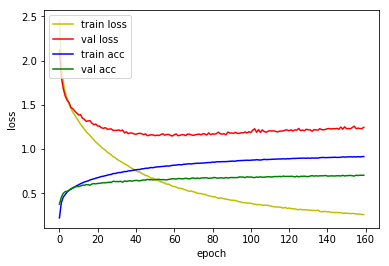

4815/4815 [==============================] - 1s 198us/sample - loss: 1.2467 - acc: 0.6280
Loss: 1.2466799556033015 Accuracy: 0.6280374

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4345 - acc: 0.2155
Epoch 00001: val_loss improved from inf to 1.94394, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_4_conv_checkpoint/001-1.9439.hdf5
36805/36805 [==============================] - 11s 311us/sample - loss: 2.4344 - acc: 0.2155 - val_loss: 1.9439 - val_acc: 0.4039
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8159 - acc: 0.4255
Epoch 00002: val_loss improved from 1.94394 to 1.65649, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_4_conv_checkpoint/002-1.6565.hdf5
36805/36805 [==============================] - 10s 267us/sample - loss: 1.8159 - acc: 0.4255 - val_loss: 1.6565 - val_acc: 0.5003
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s 

Epoch 23/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8512 - acc: 0.7446
Epoch 00023: val_loss improved from 0.92192 to 0.90401, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_4_conv_checkpoint/023-0.9040.hdf5
36805/36805 [==============================] - 10s 261us/sample - loss: 0.8511 - acc: 0.7446 - val_loss: 0.9040 - val_acc: 0.7372
Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8295 - acc: 0.7513
Epoch 00024: val_loss improved from 0.90401 to 0.89460, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_4_conv_checkpoint/024-0.8946.hdf5
36805/36805 [==============================] - 10s 264us/sample - loss: 0.8296 - acc: 0.7513 - val_loss: 0.8946 - val_acc: 0.7384
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8156 - acc: 0.7555
Epoch 00025: val_loss improved from 0.89460 to 0.88909, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_4_conv_checkpoint/025-0.8891.hdf5

Epoch 47/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.5450 - acc: 0.8358
Epoch 00047: val_loss did not improve from 0.76285
36805/36805 [==============================] - 10s 262us/sample - loss: 0.5451 - acc: 0.8358 - val_loss: 0.7648 - val_acc: 0.7817
Epoch 48/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.5354 - acc: 0.8375
Epoch 00048: val_loss did not improve from 0.76285
36805/36805 [==============================] - 10s 261us/sample - loss: 0.5355 - acc: 0.8376 - val_loss: 0.7712 - val_acc: 0.7734
Epoch 49/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.5275 - acc: 0.8378
Epoch 00049: val_loss improved from 0.76285 to 0.75668, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_DO_4_conv_checkpoint/049-0.7567.hdf5
36805/36805 [==============================] - 10s 263us/sample - loss: 0.5271 - acc: 0.8379 - val_loss: 0.7567 - val_acc: 0.7813
Epoch 50/500
36800/36805 [============================>.] - ETA: 0s

36800/36805 [============================>.] - ETA: 0s - loss: 0.3679 - acc: 0.8855
Epoch 00075: val_loss did not improve from 0.74233
36805/36805 [==============================] - 10s 268us/sample - loss: 0.3679 - acc: 0.8855 - val_loss: 0.7506 - val_acc: 0.7866
Epoch 76/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3624 - acc: 0.8862
Epoch 00076: val_loss did not improve from 0.74233
36805/36805 [==============================] - 10s 262us/sample - loss: 0.3624 - acc: 0.8863 - val_loss: 0.7628 - val_acc: 0.7827
Epoch 77/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8886
Epoch 00077: val_loss did not improve from 0.74233
36805/36805 [==============================] - 10s 264us/sample - loss: 0.3581 - acc: 0.8886 - val_loss: 0.7648 - val_acc: 0.7864
Epoch 78/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3522 - acc: 0.8897
Epoch 00078: val_loss did not improve from 0.74233
36805/36805 [==================

In [ ]:
for i in range(1, 9):
    base = '1D_CNN_only_conv_conv_5_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_only_conv_conv_5_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=100)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [ ]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_only_conv_conv_5_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 9):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, accuracy, loss])+'\n')